<a href="https://colab.research.google.com/github/Bennettmhlanga/c0d3z_01/blob/main/AI_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as ms
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Quiet warnings since this is a demo (it quiets future and deprecation warnings).
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn.csv')
df.head()

In [ ]:
#checking the usability of data
df.info()


In [ ]:
#checking for the non numeric data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.loc[df['TotalCharges'].isna()==True]

In [12]:
#data shape in terms of rows n columns
df.shape

(7043, 21)

In [ ]:
#converting categorical value into numerical value


In [ ]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
df.info()

In [ ]:
#relationship to show correlation of data


AttributeError: ignored

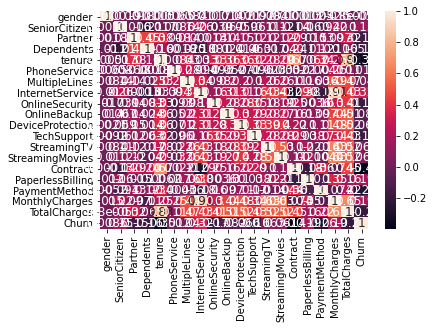

In [26]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#dropping correlated data


In [27]:
	df.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
df.info()

In [30]:
#checking churn data points we have.
print(len(df['Churn']))

7043


In [31]:
#churn rate
df['Churn'].value_counts()
#churn rate is 26.54%

0    5174
1    1869
Name: Churn, dtype: int64

AttributeError: ignored

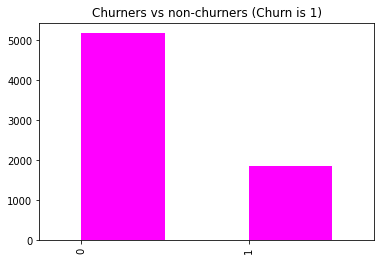

In [39]:
# the bar graph of churners v non-churners
df['Churn'].value_counts().plot(kind = 'bar', title = 'Churners vs non-churners (Churn is 1)', color = 'magenta', align = 'edge')
plt.show()


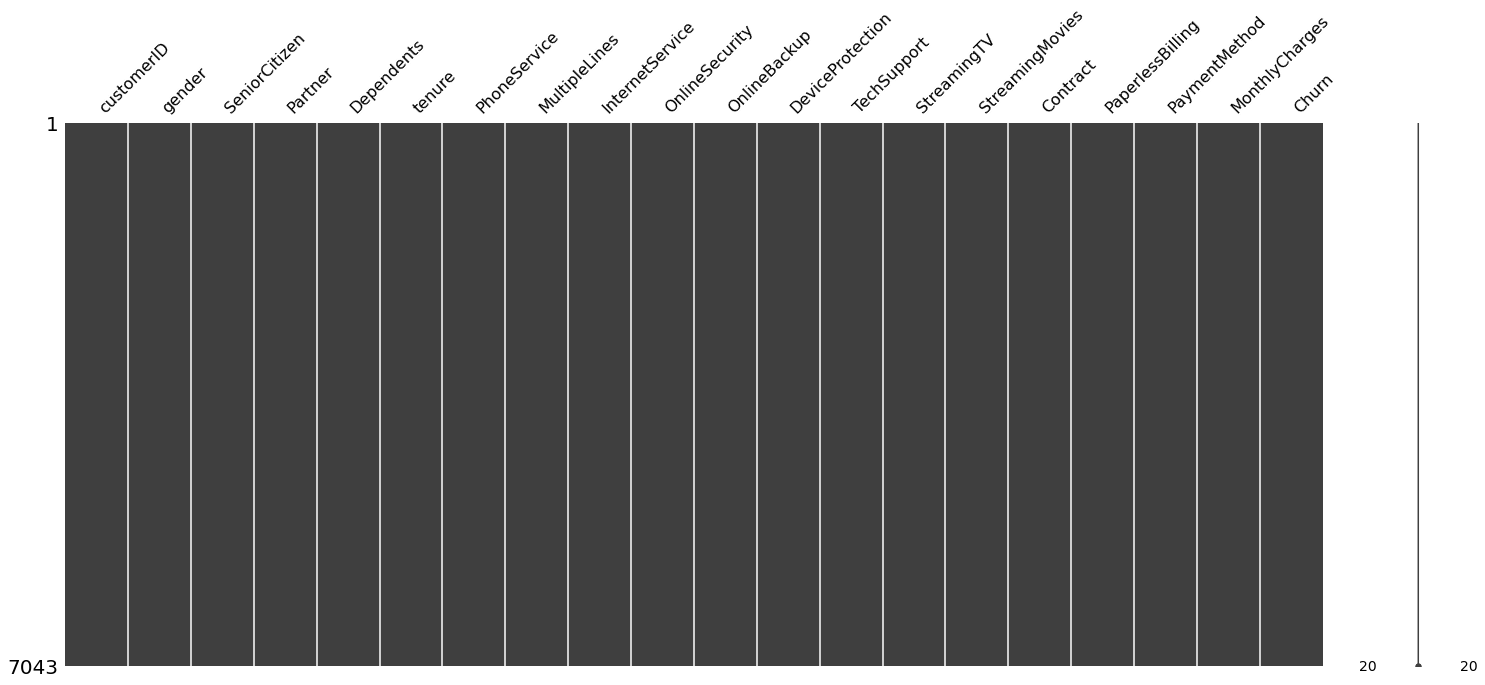

In [41]:
#black blocks indicates quality/ healthy data
ms.matrix(df)

AttributeError: ignored

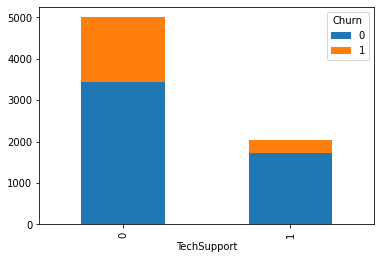

In [43]:
# explore the relationship between instances of tech support and churn. 
tech_support_churn = pd.crosstab(df['TechSupport'], df['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate in Tech Support (Churned is a 1)')
plt.show()
# non-churners use tech support more often than customers that end up churning.

AttributeError: ignored

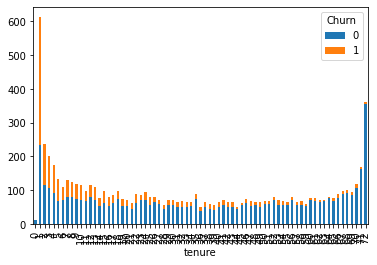

In [45]:
#churn rate to tenure
tenure_churn = pd.crosstab(df['tenure'], df['Churn'])
tenure_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate against Subscription (Churned is a 1)')
plt.show()
#Loyal customers are less likely to churn

In [46]:
#features feature distribution
features = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
df[features].describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


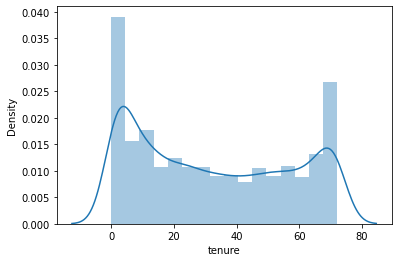

In [47]:
# Plot the distribution of observations for tenure.
sns.distplot(df['tenure']);

In [ ]:
#Preparing data


In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), 
                                                    df['Churn'], test_size=0.30, 
                                                    random_state=101)

In [53]:
train=pd.concat([X_train,y_train],axis=1)

In [ ]:
# Function to estimate the best value of n_estimators and fit the model with the given data.

In [54]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg

In [ ]:
# Function to get the accuracy of the model on the test data given the features considered.

In [55]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [ ]:
# Function to get the feature importances based on the model fit.

In [56]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [58]:
target = 'Churn'
IDcol = 'customerID'

In [ ]:
#model selection


In [59]:
!pip install xgboost


In [61]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [62]:
# These are the initial parameters before tuning.
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [64]:
from xgboost import XGBClassifier
import xgboost as xgb

In [65]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Churn'])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 34, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=34, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [66]:
get_accuracy(first_model,predictors)


Model Report
Accuracy : 0.8055
AUC Score (Train): 0.847939


MonthlyCharges      299
tenure              155
PaymentMethod        57
Contract             50
InternetService      42
SeniorCitizen        35
PaperlessBilling     34
OnlineBackup         34
StreamingTV          29
OnlineSecurity       26
gender               24
TechSupport          24
MultipleLines        20
Partner              20
StreamingMovies      19
PhoneService         17
DeviceProtection     16
Dependents           16
dtype: int64


AttributeError: ignored

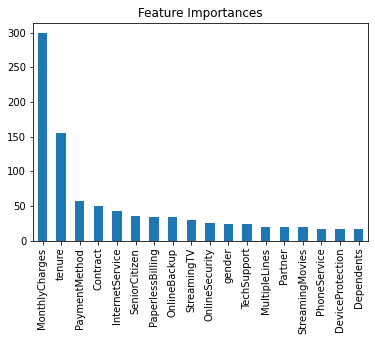

In [67]:
get_feature_importances(first_model)

In [ ]:
#prediction by removing less important features
